<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-louvain
!pip install networkx
!pip install cdlib

In [ ]:
pip install --upgrade networkx

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from random import sample
import numpy as np

In [4]:
filenameTwitter = "/content/twitter/1046661.edges"

In [22]:
filenameFacebook = "/content/facebook/414.edges"

In [5]:
graphTwitter = nx.DiGraph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphTwitter.nodes):
            graphTwitter.add_node(a)
        if b not in list(graphTwitter.nodes):
            graphTwitter.add_node(b)

        graphTwitter.add_edge(a, b)

In [23]:
graphFacebook = nx.Graph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphTwitter.nodes):
            graphTwitter.add_node(a)
        if b not in list(graphTwitter.nodes):
            graphTwitter.add_node(b)

        graphTwitter.add_edge(a, b)

#Question (a)

In [14]:
listOfNodesWithCorrespondingDegrees = list(graphTwitter.degree(list(graphTwitter.nodes)))
sortedListOfNodesWithCorrespondingDegrees = sorted(
    listOfNodesWithCorrespondingDegrees,
    key=lambda t: t[1],
    reverse=True)

tenNodesWithHighestDegree = []

for i in range(0, 10):
  tenNodesWithHighestDegree.append(sortedListOfNodesWithCorrespondingDegrees[i])
  
tenNodes = []

for i in range(0, 10):
  tenNodes.append(tenNodesWithHighestDegree[i][0])
print(tenNodes)

[991221, 1116721, 1117341, 1044591, 678953, 1118781, 1268821, 1047451, 1048661, 1269251]


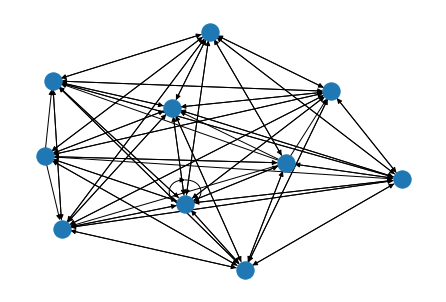

In [21]:
inducedTwitter = nx.induced_subgraph(graphTwitter, tenNodes)
nx.draw(inducedTwitter)

#Question (b)

For community detection, there are the following algorithms:

* Girvan-Newman algorithm
* Greedy_modularity_communities algorithm
* K-means algorithm


#Question (c)

Girvan-Newman algorithm

In [38]:
communitiesGN = community.girvan_newman(graphTwitter)

In [39]:
nodeGroupsGN = []

for community in next(communitiesGN):
  nodeGroupsGN.append(list(community))

print(len(nodeGroupsGN))

3


In [44]:
listOfColors = []

for i in range(len(nodeGroupsGN)):
  listOfColors.append(list(np.random.choice(range(255),size=3)))

for i in range(len(listOfColors)):
  for j in range(3):
    listOfColors[i][j] = listOfColors[i][j] /255
print(listOfColors)

[[0.5843137254901961, 0.7137254901960784, 0.4], [0.41568627450980394, 0.5686274509803921, 0.03137254901960784], [0.4745098039215686, 0.30196078431372547, 0.28627450980392155]]


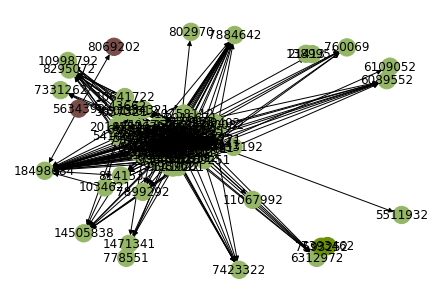

In [45]:
color_map = []

for node in graphTwitter:
  for i in range(len(nodeGroupsGN)):
    if node in nodeGroupsGN[i]:
      color_map.append(listOfColors[i])
nx.draw(graphTwitter, node_color=color_map, with_labels=True)
plt.show()

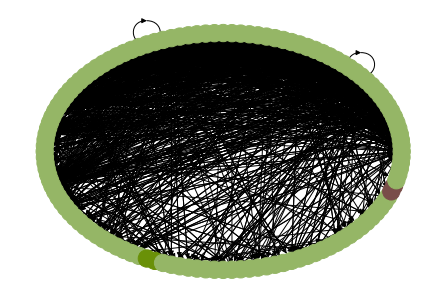

In [46]:
nx.draw_circular(graphTwitter, node_color=color_map)
plt.show()

In [57]:
print(girvanNewmanTwitter[-1])

({1044771}, {7423322}, {9921142}, {4556941}, {2916671}, {1049111}, {17743}, {1452261}, {1403031}, {1049981}, {1118161}, {1117341}, {6100262}, {51421542}, {991221}, {814153}, {1116721}, {795536}, {1269251}, {1468951}, {2217251}, {5516192}, {1044591}, {1118781}, {1975721}, {678953}, {8956052}, {5515802}, {6277512}, {1045141}, {6550132}, {1047451}, {5920812}, {14106930}, {5066391}, {1043241}, {11726932}, {1047961}, {1268821}, {6752812}, {1478151}, {5653212}, {6194262}, {18498684}, {11067992}, {6312972}, {6945012}, {1478471}, {7715252}, {1048661}, {10776252}, {6354792}, {6243662}, {8295072}, {6745742}, {5678622}, {3956091}, {1476651}, {9566042}, {7884642}, {2014851}, {9952802}, {10998792}, {5659662}, {5697472}, {5450132}, {4952751}, {1534321}, {6269452}, {13332922}, {6149912}, {2681811}, {5885472}, {6451962}, {4379101}, {7065032}, {6109052}, {4841921}, {6350182}, {760069}, {3527151}, {8706322}, {7305042}, {10641722}, {6236122}, {9598762}, {3037321}, {7393462}, {7593252}, {820485}, {5410072

In [32]:
community.k_clique_communities(graphTwitter, 4)

<generator object k_clique_communities at 0x7f638c9de3d0>

In [35]:
community.greedy_modularity_communities(graphTwitter)

[frozenset({802970,
            820485,
            1043241,
            1045141,
            1047451,
            1047961,
            1048661,
            1116721,
            1118781,
            1269251,
            1452261,
            1468951,
            1476651,
            1975721,
            2217251,
            2271071,
            2916671,
            4379101,
            4556941,
            4841921,
            5066391,
            5190551,
            5511932,
            5516192,
            5653212,
            5697472,
            5800082,
            6109052,
            6312972,
            6550132,
            6745742,
            6752812,
            6945012,
            7305042,
            7331262,
            7423322,
            8187632,
            8639402,
            8944162,
            9817642,
            9921142,
            9952802,
            10998792,
            11726932,
            13332922,
            14106930,
            18498684,
          

In [41]:
community.asyn_fluidc(graphFacebook, 4)

NetworkXPointlessConcept: ignored

In [36]:
community.asyn_lpa_communities(graphTwitter)

<generator object asyn_lpa_communities at 0x7f638c8e1950>

In [37]:
print(community.louvain_communities(graphTwitter))

AttributeError: ignored